In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()

In [2]:
dataset = pd.read_csv("/home/huseinzol05/AI/visualization/jihah/log-CTI-fyp.csv")

# remove unimportant columns
columns = ['FileTimeUtc', 'SourceIp', 'TargetIp', 'Payload', 'SourceIpCountryCode', 'SourceIpPostalCode', 'HttpRequest',
          'HttpReferrer', 'HttpUserAgent', 'HttpMethod', 'HttpVersion', 'HttpHost', 'Custom Field 1', 'Custom Field 2',
          'Custom Field 3', 'Custom Field 4', 'Custom Field 5']

# iterate one by one to remove
for i in columns:
    del dataset[i]

# sum NaN for each rows
counter_nan = dataset.isnull().sum()
# get rows that sum of NaN == 0
counter_without_nan = counter_nan[counter_nan == 0]
# get rows that do not have NaN keys
dataset = dataset[counter_without_nan.keys()]

Some of the left columns are string type, so lets change string into int using sklearn.labelencoder

Below I will try to normalize using t-Distributed Stochastic Neighbor Embedding (t-SNE)

![alt text](https://raw.githubusercontent.com/huseinzol05/Introduction-Computer-Vision/master/picture/Screenshot%20from%202017-04-23%2015-16-05.png)

If you understand the equation, basically if an element has high value, probability of that element related to its population is high, and it will scattered on high value hypothesis plane.

exponent equation, totally logistic

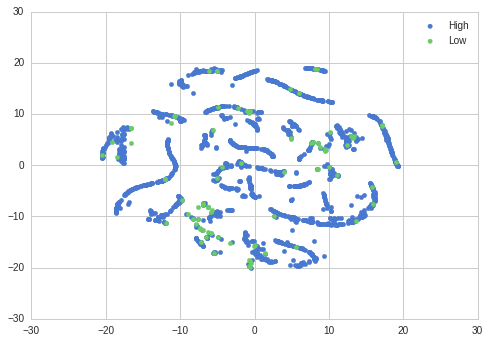

In [3]:
from sklearn.preprocessing import LabelEncoder

# 'spring' related data into low dimension
from sklearn.manifold import TSNE

# copy first
dataset_copy = dataset.copy()

# change strings value into int, sorted by characters
for i in xrange(dataset_copy.ix[:, :].shape[1]):
    if str(type(dataset_copy.ix[0, i])).find('str') > 0:
        dataset_copy.ix[:, i] = LabelEncoder().fit_transform(dataset_copy.ix[:, i])

labelthreat = ['High', 'Low']

# our X is first columns until second last columns
X = dataset_copy.ix[:, :-1].values

# our Y is last column
Y = dataset_copy.ix[:, -1].values

X = TSNE(n_components = 2).fit_transform(X)

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(X[Y == no, 0], X[Y == no, 1], color = current_palette[no], label = labelthreat[no])
    
plt.legend()
plt.show()

Wow, the data very horrible, how about we normalized and standard the data to unit variance?

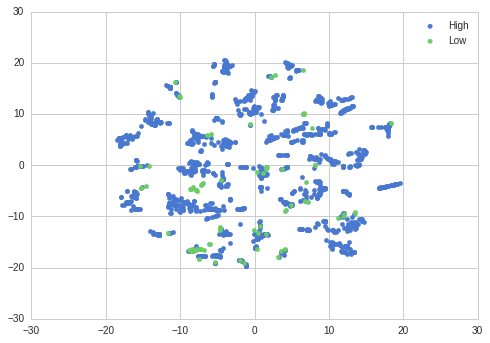

In [4]:
from sklearn.preprocessing import LabelEncoder

# 'spring' related data into low dimension
from sklearn.manifold import TSNE

# copy first
dataset_copy = dataset.copy()

# change strings value into int, sorted by characters
for i in xrange(dataset_copy.ix[:, :].shape[1]):
    if str(type(dataset_copy.ix[0, i])).find('str') > 0:
        dataset_copy.ix[:, i] = LabelEncoder().fit_transform(dataset_copy.ix[:, i])

labelthreat = ['High', 'Low']

# our X is first columns until second last columns
X = dataset_copy.ix[:, :-1].values

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

X = StandardScaler().fit_transform(X)
X = Normalizer().fit_transform(X)

# our Y is last column
Y = dataset_copy.ix[:, -1].values

X = TSNE(n_components = 2).fit_transform(X)

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(X[Y == no, 0], X[Y == no, 1], color = current_palette[no], label = labelthreat[no])
    
plt.legend()
plt.show()

Is it getting better? mehhhhhhhhhhh
Let's we try to use PCA, principal component

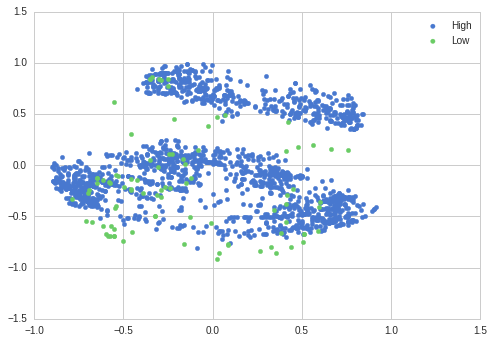

In [5]:
from sklearn.preprocessing import LabelEncoder

# 'spring' related data into low dimension
from sklearn.decomposition import PCA

# copy first
dataset_copy = dataset.copy()

# change strings value into int, sorted by characters
for i in xrange(dataset_copy.ix[:, :].shape[1]):
    if str(type(dataset_copy.ix[0, i])).find('str') > 0:
        dataset_copy.ix[:, i] = LabelEncoder().fit_transform(dataset_copy.ix[:, i])

labelthreat = ['High', 'Low']

# our X is first columns until second last columns
X = dataset_copy.ix[:, :-1].values

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

X = StandardScaler().fit_transform(X)
X = Normalizer().fit_transform(X)

# our Y is last column
Y = dataset_copy.ix[:, -1].values

X = PCA(n_components = 2).fit_transform(X)

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(X[Y == no, 0], X[Y == no, 1], color = current_palette[no], label = labelthreat[no])
    
plt.legend()
plt.show()

Okey, this one is better. Now you can understand the hypothesis plane if in 2 dimension. The data scattered nicely in PCA after normalization and standardization, so to do binary classification a lot easier.

You are correct, use logistic regression. But need to put a lot of dropout between nets to prevent overfitting and penalty system if the nets learn too fast.

Better use RELU as activation function, i think linear activation is good for this one, separating linearly during train, and do softmax logistic during predict the hypothesis.

But what is the colleration between columns?

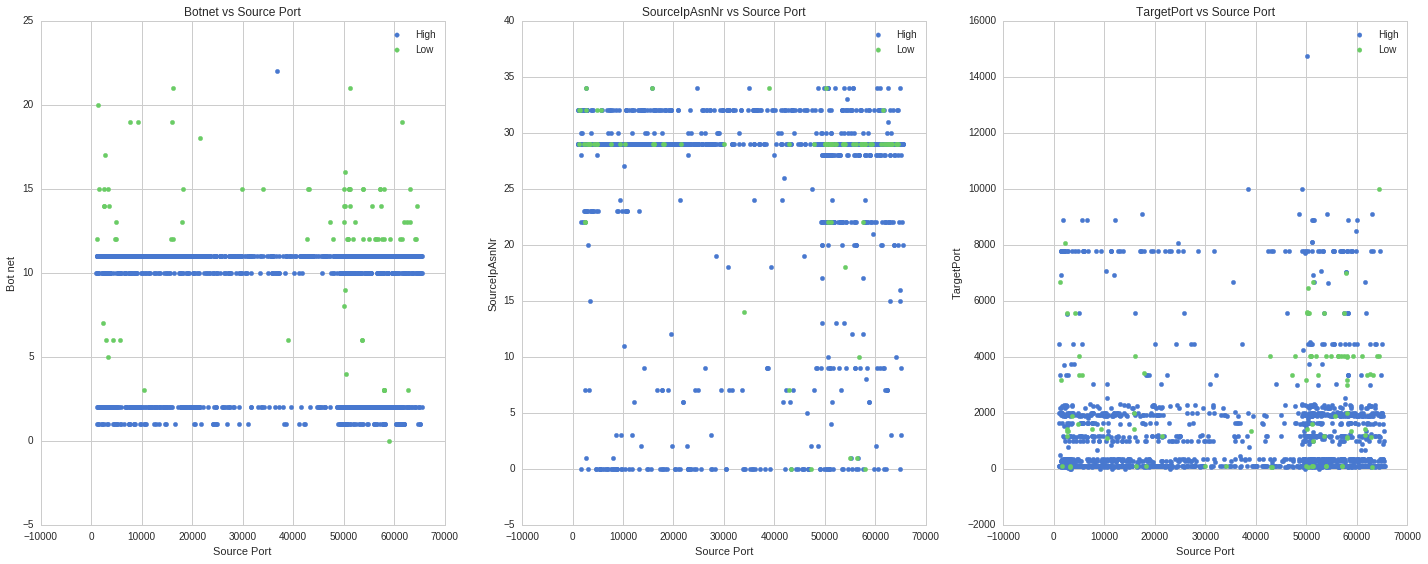

In [9]:
fig = plt.figure(figsize = (20,8))

labelthreat = ['High', 'Low']

# copy first
dataset_copy = dataset.copy()

# change strings value into int, sorted by characters
for i in xrange(dataset_copy.ix[:, :].shape[1]):
    if str(type(dataset_copy.ix[0, i])).find('str') > 0:
        dataset_copy.ix[:, i] = LabelEncoder().fit_transform(dataset_copy.ix[:, i])
        
# our anchor
Y = dataset_copy.ix[:, -1].values

plt.subplot(1, 3, 1)
y = dataset_copy['Botnet'].values
x = dataset_copy['SourcePort'].values

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(x[Y == no], y[Y == no], color = current_palette[no], label = labelthreat[no])
    
plt.legend()
plt.ylabel('Bot net')
plt.xlabel('Source Port')
plt.title('Botnet vs Source Port')

plt.subplot(1, 3, 2)
y = dataset_copy['SourceIpAsnNr'].values

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(x[Y == no], y[Y == no], color = current_palette[no], label = labelthreat[no])
    
plt.legend()
plt.ylabel('SourceIpAsnNr')
plt.xlabel('Source Port')
plt.title('SourceIpAsnNr vs Source Port')


plt.subplot(1, 3, 3)
y = dataset_copy['TargetPort'].values

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(x[Y == no], y[Y == no], color = current_palette[no], label = labelthreat[no])
    
plt.legend()
plt.ylabel('TargetPort')
plt.xlabel('Source Port')
plt.title('TargetPort vs Source Port')

fig.tight_layout()        
plt.show()

i change botnet value into int

I visualized back into dictionary to make you understand.

botnet in value 1, 2, 10, 11 have HIGH THREAD CONFIDENCE

In [13]:
dictionary = dict(zip(np.unique(dataset['Botnet'].values).tolist(), np.unique(dataset_copy['Botnet'].values).tolist()))

dictionary

{'B106-Ainslot': 0,
 'B106-Bladabindi': 1,
 'B106-CB': 2,
 'B106-Ceatrg': 3,
 'B106-Comrerop': 4,
 'B106-Dimegup': 5,
 'B106-Fynloski': 6,
 'B106-Hupigon': 7,
 'B106-Injector': 8,
 'B106-Itsproc': 9,
 'B106-Jenxcus': 10,
 'B106-MULTI': 11,
 'B106-Malagent': 12,
 'B106-NetWiredRC': 13,
 'B106-Poison': 14,
 'B106-Rebhip': 15,
 'B106-Rimod': 16,
 'B106-Scar': 17,
 'B106-Sisron': 18,
 'B106-Tapazom': 19,
 'B106-VB': 20,
 'B106-Xtrat': 21,
 'B93-CONFIG': 22}

i change SourceIpAsnNr value into int

i don't know what column is this, source ip?

SourceIpAsnNr in value 0, 29, 33 have HIGH THREAD CONFIDENCE

In [14]:
dictionary = dict(zip(np.unique(dataset['SourceIpAsnNr'].values).tolist(), np.unique(dataset_copy['SourceIpAsnNr'].values).tolist()))

dictionary

{'AS10030': 0,
 'AS132435': 1,
 'AS132514': 2,
 'AS132688': 3,
 'AS132882': 4,
 'AS132890': 5,
 'AS17564': 6,
 'AS17971': 7,
 'AS18206': 8,
 'AS2042': 9,
 'AS23678': 10,
 'AS23736': 11,
 'AS23969': 12,
 'AS24028': 13,
 'AS24068': 14,
 'AS24090': 15,
 'AS24218': 16,
 'AS24321': 17,
 'AS24514': 18,
 'AS38044': 19,
 'AS38182': 20,
 'AS38199': 21,
 'AS38322': 22,
 'AS38466': 23,
 'AS38868': 24,
 'AS40575': 25,
 'AS45121': 26,
 'AS45410': 27,
 'AS45960': 28,
 'AS4788': 29,
 'AS4818': 30,
 'AS5087': 31,
 'AS9534': 32,
 'AS9655': 33,
 'AS9930': 34}

Low TargetPort has HIGH THREAD CONFIDENCE

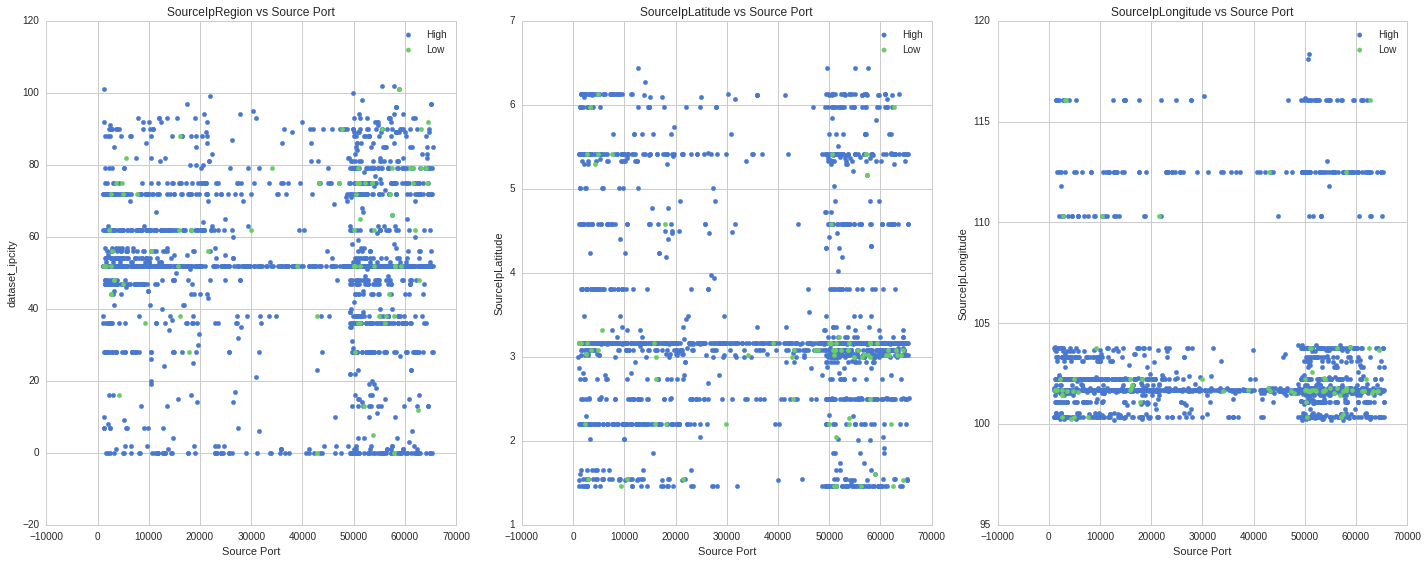

In [31]:
fig = plt.figure(figsize = (20,8))

labelthreat = ['High', 'Low']

# copy first
dataset_copy = dataset.copy()

# change strings value into int, sorted by characters
for i in xrange(dataset_copy.ix[:, :].shape[1]):
    if str(type(dataset_copy.ix[0, i])).find('str') > 0:
        dataset_copy.ix[:, i] = LabelEncoder().fit_transform(dataset_copy.ix[:, i])

# our main dataset do not have 'SourceIpCity'
dataset_ipcity = pd.read_csv("/home/huseinzol05/AI/visualization/jihah/log-CTI-fyp.csv")

dataset_ipcity = dataset_ipcity['SourceIpCity']

dataset_ipcity = LabelEncoder().fit_transform(dataset_ipcity)
        
# our anchor
Y = dataset_copy.ix[:, -1].values

plt.subplot(1, 3, 1)

y = dataset_ipcity

x = dataset_copy['SourcePort'].values

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(x[Y == no], y[Y == no], color = current_palette[no], label = labelthreat[no])
    
plt.legend()
plt.ylabel('dataset_ipcity')
plt.xlabel('Source Port')
plt.title('SourceIpRegion vs Source Port')

plt.subplot(1, 3, 2)
y = dataset_copy['SourceIpLatitude'].values

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(x[Y == no], y[Y == no], color = current_palette[no], label = labelthreat[no])
    
plt.legend()
plt.ylabel('SourceIpLatitude')
plt.xlabel('Source Port')
plt.title('SourceIpLatitude vs Source Port')

plt.subplot(1, 3, 3)
y = dataset_copy['SourceIpLongitude'].values

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(x[Y == no], y[Y == no], color = current_palette[no], label = labelthreat[no])
    
plt.legend()
plt.ylabel('SourceIpLongitude')
plt.xlabel('Source Port')
plt.title('SourceIpLongitude vs Source Port')

fig.tight_layout()        
plt.show()

In [34]:
dataset_ipcity = pd.read_csv("/home/huseinzol05/AI/visualization/jihah/log-CTI-fyp.csv")

dataset_ipcity = dataset_ipcity['SourceIpCity'].values

label_city = np.unique(dataset_ipcity).tolist()

dataset_ipcity = LabelEncoder().fit_transform(dataset_ipcity)

city = np.unique(dataset_ipcity).tolist()

dictionary = dict(zip(label_city, city))

dictionary

{nan: 0,
 'Alor Setar': 1,
 'Ampang': 2,
 'Ayer Hitam': 3,
 'Ayer Itam': 4,
 'Ayer Keroh': 5,
 'Bachok': 6,
 'Bagan Serai': 7,
 'Bahau': 8,
 'Balik Pulau': 9,
 'Bandar': 10,
 'Bandar Baru Bangi': 11,
 'Baru': 12,
 'Batu Caves': 13,
 'Batu Gajah': 14,
 'Batu Pahat': 15,
 'Bayan Lepas': 16,
 'Bharu': 17,
 'Bintulu': 18,
 'Bukit Mertajam': 19,
 'Butterworth': 20,
 'Cameron Highlands': 21,
 'Chemor': 22,
 'Cheras': 23,
 'Damansara': 24,
 'Dungun': 25,
 'Gerik': 26,
 'Gurun': 27,
 'Ipoh': 28,
 'Jasin': 29,
 'Jelutong': 30,
 'Jenjarom': 31,
 'Jerantut': 32,
 'Jerteh': 33,
 'Jitra': 34,
 'Johor': 35,
 'Johor Bahru': 36,
 'Johore Bharu': 37,
 'Kajang': 38,
 'Kampar': 39,
 'Kangar': 40,
 'Kemaman': 41,
 'Keningau': 42,
 'Kepong': 43,
 'Klang': 44,
 'Kluang': 45,
 'Kota': 46,
 'Kota Bharu': 47,
 'Kota Kinabalu': 48,
 'Kota Tinggi': 49,
 'Kuala Kangsar': 50,
 'Kuala Lipis': 51,
 'Kuala Lumpur': 52,
 'Kuala Terengganu': 53,
 'Kuantan': 54,
 'Kubang Kerian': 55,
 'Kuching': 56,
 'Kulai': 57,
 'Kuli

You judge by yourself. haha